# Description

Being able to understand, use, and summarize non-numerical data—such as a person’s blood type or marital status—is a vital component of being a data scientist. A wide range of datasets including the characteristics of adoptable dogs, Las Vegas trip reviews, and census data to develop your skills at working with categorical data.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

## Introduction to Categorical Data
Almost every dataset contains categorical information—and often it’s an unexplored goldmine of information. 

### Exploring a target variable

In [44]:
adult = pd.read_csv('adult.csv')

In [45]:
adult.head(5)

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [46]:
# Explore the Above/Below 50k variable
print(adult["Above/Below 50k"].describe())

# Print a frequency table of "Above/Below 50k"
print(adult["Above/Below 50k"].value_counts())

# Print relative frequency values
print(adult["Above/Below 50k"].value_counts(normalize = True))

count      32561
unique         2
top        <=50K
freq       24720
Name: Above/Below 50k, dtype: object
 <=50K    24720
 >50K      7841
Name: Above/Below 50k, dtype: int64
 <=50K    0.75919
 >50K     0.24081
Name: Above/Below 50k, dtype: float64


**Above/Below 50k is a categorical variable with only two categories. Using both the `.describe()` and `.value_counts()` methods you can see that the dataset is a little imbalanced towards people making less than $50,000.**

### Setting dtype when reading data

In [47]:
# Check the dtypes
print(adult.dtypes)

# Create a dictionary with column names as keys and "category" as values
adult_dtypes = {
   "Workclass": "category",
   "Education": "category",
   "Relationship": "category",
   "Above/Below 50k": "category" 
}

# Read in the CSV using the dtypes parameter
adult2 = pd.read_csv(
  "adult.csv",
  dtype = adult_dtypes
)
print(adult2.dtypes)

Age                 int64
Workclass          object
fnlgwt              int64
Education          object
Education Num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Country            object
Above/Below 50k    object
dtype: object
Age                   int64
Workclass          category
fnlgwt                int64
Education          category
Education Num         int64
Marital Status       object
Occupation           object
Relationship       category
Race                 object
Sex                  object
Capital Gain          int64
Capital Loss          int64
Hours/Week            int64
Country              object
Above/Below 50k    category
dtype: object


**Using the categorical dtype is a great way to save memory and boost performance. Specifying the dtypes will lower the amount of memory required to load your dataset. This is quite helpful when dealing with large datasets!**

### Create lots of groups
You want to find the mean Age of adults when grouping by the following categories:

- "Workclass" (which has 9 categories)
- "Above/Below 50k" (which has 2 categories)
- "Education" (which has 16 categories).

In [48]:
gb = adult.groupby(by=["Workclass", "Above/Below 50k", "Education"])

In [49]:
gb.size()

Workclass     Above/Below 50k  Education    
 ?             <=50K            10th             98
                                11th            118
                                12th             38
                                1st-4th          12
                                5th-6th          28
                                               ... 
 State-gov     >50K             Some-college     31
 Without-pay   <=50K            7th-8th           1
                                Assoc-acdm        1
                                HS-grad           9
                                Some-college      3
Length: 208, dtype: int64

**Only combinations of the three variables that exist are created when using groupby(). In this example, 208 groups are created out of 288 (2 * 9 * 16) possible groups.**

In [50]:
# Group the adult dataset by "Sex" and "Above/Below 50k"
gb = adult.groupby(by = ["Sex", "Above/Below 50k"])

# Print out how many rows are in each created group
print(gb.size())

# Print out the mean of each group for all columns
print(gb.mean())

Sex      Above/Below 50k
 Female   <=50K              9592
          >50K               1179
 Male     <=50K             15128
          >50K               6662
dtype: int64
                               Age         fnlgwt  Education Num  \
Sex     Above/Below 50k                                            
 Female  <=50K           36.210801  185999.381359       9.820475   
         >50K            42.125530  183687.406277      11.787108   
 Male    <=50K           37.147012  193093.609268       9.452142   
         >50K            44.625788  188769.101321      11.580606   

                         Capital Gain  Capital Loss  Hours/Week  
Sex     Above/Below 50k                                          
 Female  <=50K             121.986134     47.364470   35.916701  
         >50K             4200.389313    173.648855   40.426633  
 Male    <=50K             165.723823     56.806782   40.693879  
         >50K             3971.765836    198.780396   46.366106  


**It does look like the proportion of women making more than 50k is a lot lower than men. However, women making more than 50k are on average younger than their male counterparts.**

In [51]:
# Create a list of user-selected variables
user_list = ["Education", "Above/Below 50k"]

# Create a GroupBy object using this list
gb = adult.groupby(by=user_list)

# Find the mean for the variable "Hours/Week" for each group - Be efficient!
print(gb["Hours/Week"].mean())

Education      Above/Below 50k
 10th           <=50K             36.574053
                >50K              43.774194
 11th           <=50K             33.322870
                >50K              45.133333
 12th           <=50K             35.035000
                >50K              44.818182
 1st-4th        <=50K             37.864198
                >50K              48.833333
 5th-6th        <=50K             38.539432
                >50K              46.000000
 7th-8th        <=50K             38.830033
                >50K              47.500000
 9th            <=50K             37.667351
                >50K              44.851852
 Assoc-acdm     <=50K             39.264339
                >50K              44.256604
 Assoc-voc      <=50K             40.817826
                >50K              43.853186
 Bachelors      <=50K             40.586152
                >50K              45.475462
 Doctorate      <=50K             45.429907
                >50K              47.513072
 

## Categorical pandas Series

In [52]:
dogs = pd.read_csv('ShelterDogs.csv')

In [53]:
dogs.head(5)

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,23807,Gida,0.25,female,Unknown Mix,12/10/19,12/11/19,12/11/19,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,533,Frida És Ricsi,0.17,female,Unknown Mix,12/1/19,12/1/19,12/9/19,black and white,short,small,no,NaN,yes,yes,yes,yes,yes,NaN
2,23793,NaN,4.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23795,NaN,1.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23806,Amy,2.00,female,French Bulldog Mix,12/10/19,12/11/19,12/11/19,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Check frequency counts while also printing the NaN count
print(dogs["keep_in"].value_counts(dropna=False))

# Switch to a categorical variable
dogs["keep_in"] = dogs["keep_in"].astype("category")

# Add new categories
new_categories = ["Unknown History", "Open Yard (Countryside)"]
dogs["keep_in"] = dogs["keep_in"].cat.add_categories(new_categories)

# Check frequency counts one more time
print(dogs['keep_in'].value_counts(dropna = False))

both flat and garden    1224
NaN                     1021
garden                   510
flat                     182
Name: keep_in, dtype: int64
both flat and garden       1224
NaN                        1021
garden                      510
flat                        182
Unknown History               0
Open Yard (Countryside)       0
Name: keep_in, dtype: int64


In [56]:
# Set "maybe" to be "no"
dogs["likes_children"] = dogs["likes_children"].astype("category")
dogs.loc[dogs["likes_children"] == "maybe", "likes_children"] = "no"

# Print out categories
print(dogs["likes_children"].cat.categories)

# Print the frequency table
print(dogs["likes_children"].value_counts())

Index(['no', 'yes'], dtype='object')
yes    1172
no       47
Name: likes_children, dtype: int64


In [57]:
# Create the my_changes dictionary
my_changes = {"Maybe?" : "Maybe"}

# Rename the categories listed in the my_changes dictionary
dogs["likes_children"] = dogs["likes_children"].cat.rename_categories( my_changes)

# Use a lambda function to convert all categories to uppercase using upper()
dogs["likes_children"] =  dogs["likes_children"].cat.rename_categories(lambda c: c.upper())

# Print the list of categories
print(dogs["likes_children"].cat.categories)

Index(['NO', 'YES'], dtype='object')


### Collapsing categories

In [58]:
# Create the update_coats dictionary
update_coats = {"wirehaired":"medium",
                "medium-long":"medium"}

# Create a new column, coat_collapsed
dogs["coat_collapsed"] = dogs["coat"].replace(update_coats)

# Convert the column to categorical
dogs["coat_collapsed"] = dogs["coat_collapsed"].astype("category")

# Print the frequency table
print(dogs["coat_collapsed"].value_counts())

short     1972
medium     785
long       180
Name: coat_collapsed, dtype: int64


**By collapsing four categories down to three, you have simplified your data. If you repeat this across several columns, the total combination of categories across these variables will be greatly reduced.**

In [59]:
# Print out the current categories of the size variable
dogs["size"] = dogs["size"].astype("category")
print(dogs["size"].cat.categories)

# Reorder the categories, specifying the Series is ordinal, and overwriting the original series
dogs["size"].cat.reorder_categories(
  new_categories=["small", "medium", "large"],
  ordered=True,
  inplace = True
)  

Index(['large', 'medium', 'small'], dtype='object')


In [60]:
# How many Male/Female dogs are available of each size?
print(dogs.groupby("size")["sex"].value_counts())

# Do larger dogs need more room to roam?
print(dogs.groupby("size")["keep_in"].value_counts(normalize=True))

size    sex   
small   male       260
        female     214
medium  male      1090
        female     854
large   male       331
        female     188
Name: sex, dtype: int64
size                           
small   both flat and garden       0.702065
        flat                       0.235988
        garden                     0.061947
        Unknown History            0.000000
        Open Yard (Countryside)    0.000000
medium  both flat and garden       0.657568
        garden                     0.262200
        flat                       0.080232
        Unknown History            0.000000
        Open Yard (Countryside)    0.000000
large   both flat and garden       0.519022
        garden                     0.467391
        flat                       0.013587
        Unknown History            0.000000
        Open Yard (Countryside)    0.000000
Name: keep_in, dtype: float64


**There are more medium male dogs than any other combination of size and sex. It also looks like larger dogs are more often kept outside, as opposed to a flat.**

## Cleaning variables

Users of an online entry system used to have the ability to freely type in responses to questions. This is causing issues when trying to analyze the adoptable dogs dataset, dogs.

In [61]:
# Fix the misspelled word
replace_map = {"Malez": "male"}

# Update the sex column using the created map
dogs["sex"] = dogs["sex"].replace(replace_map)

# Strip away leading whitespace
dogs["sex"] = dogs["sex"].str.strip()

# Make all responses lowercase
dogs["sex"] = dogs["sex"].str.lower()

# Convert to a categorical Series
dogs["sex"] = dogs["sex"].astype("category")

print(dogs["sex"].value_counts())

male      1681
female    1256
Name: sex, dtype: int64


In [66]:
# Find the count of male and female dogs who have a "long" coat
print(dogs.loc[dogs["coat"] == "long", "sex"].value_counts())

# Print the mean age of dogs with a breed of "English Cocker Spaniel"
print(dogs.loc[dogs["breed"] == "English Cocker Spaniel", "age"].mean())

# Count the number of dogs that have "English" in their breed name
print(dogs[dogs["breed"].str.contains("English", regex=False)].shape[0])

male      124
female     56
Name: sex, dtype: int64
8.186153846153847
35


**There are currently 24 dogs up for adoption with "English" in their breed name.**

## Visualizing Categorical Data

In [67]:
reviews = pd.read_csv("lasvegas_tripadvisor.csv")

When people leave reviews for products, services, or destinations, people reading those reviews can sometimes mark the original review as helpful. If enough people mark the review as helpful, future readers of these reviews might be more likely to trust the content of the original review.

Using the reviews dataset, explore the continuous variable "Helpful votes" across the different categories found in the "Traveler type" variable.

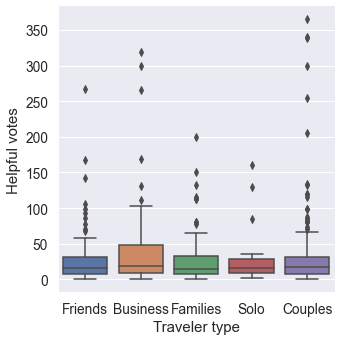

In [69]:
# Set the font size to 1.25
sns.set(font_scale = 1.25)

# Set the background to "darkgrid"
sns.set_style("darkgrid")

# Create a boxplot
sns.catplot(x = "Traveler type",
            y = "Helpful votes",
            data = reviews,
            kind = "box")

plt.show()

**It looks like business travelers have left the most helpful reviews, although there are a few reviews by couples that have been really helpful to others.**

Mar-May    128
Jun-Aug    126
Sep-Nov    126
Dec-Feb    124
Name: Period of stay, dtype: int64


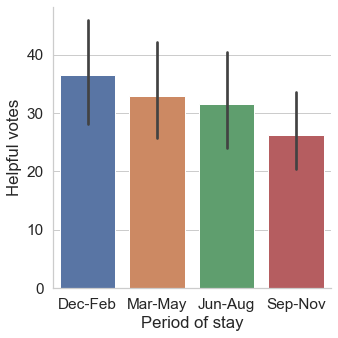

In [70]:
# Print the frequency counts of "Period of stay"
print(reviews["Period of stay"].value_counts())

sns.set(font_scale=1.4)
sns.set_style("whitegrid")

# Create a bar plot of "Helpful votes" by "Period of stay"
sns.catplot(x="Period of stay", y="Helpful votes", data=reviews, kind="bar")
plt.show()

**With `.value_counts()` we see that each category has a similar number of reviews. It also looks like potential guests find reviews from December-February to be the most helpful, while reviews from September-November appear to be the least helpful.**

North America    295
Europe           118
Oceania           41
Asia              36
Africa             7
South America      7
Name: User continent, dtype: int64


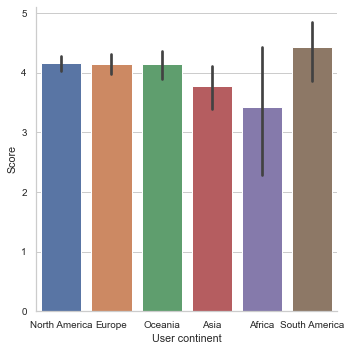

In [71]:
# Set style
sns.set(font_scale=.9)
sns.set_style("whitegrid")

# Print the frequency counts for "User continent"
print(reviews["User continent"].value_counts())

# Convert "User continent" to a categorical variable
reviews["User continent"] = reviews["User continent"].astype("category")

# Reorder "User continent" using continent_categories and rerun the graphic
continent_categories = list(reviews["User continent"].value_counts().index)
reviews["User continent"] = reviews["User continent"].cat.reorder_categories(new_categories=continent_categories)
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar")
plt.show()

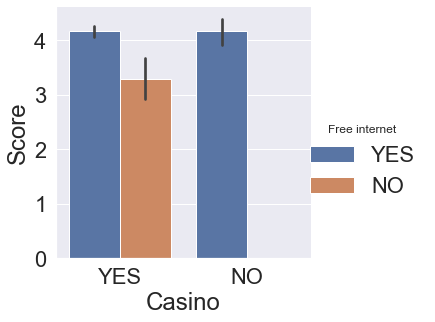

In [78]:
# Add a second category to split the data on: "Free internet"
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x = "Casino", y="Score", data=reviews, kind="bar", hue = "Free internet")
plt.show()

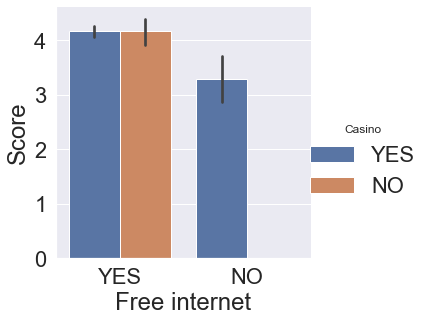

In [79]:
# Switch the x and hue categories
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x="Free internet", y="Score", kind = "bar",data = reviews,hue = 'Casino')
plt.show()

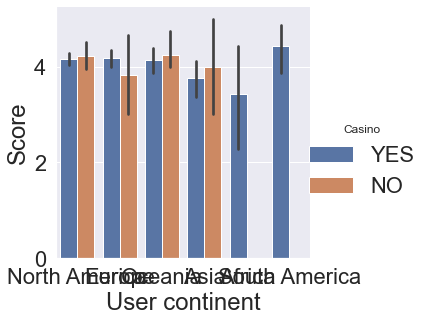

In [80]:
# Update x to be "User continent"
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar", hue="Casino")
plt.show()

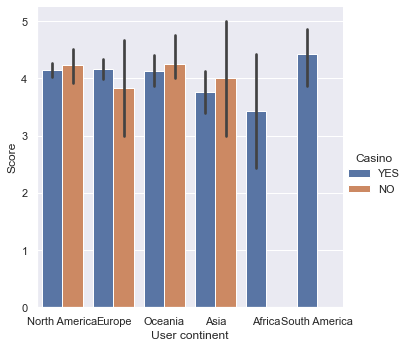

In [83]:
# Lower the font size so that all text fits on the screen.
sns.set(font_scale = 1)
sns.set_style("darkgrid")
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar", hue="Casino")
plt.show()

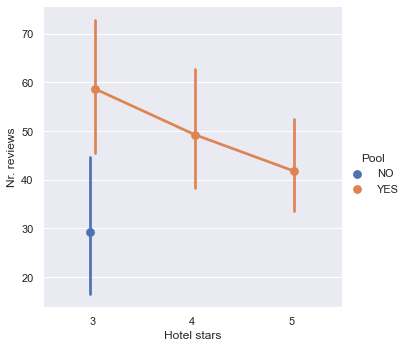

In [84]:
# Create a point plot with catplot using "Hotel stars" and "Nr. reviews"
sns.catplot(
  # Split the data across Hotel stars and summarize Nr. reviews
  x = "Hotel stars",
  y = "Nr. reviews",
  data=reviews,
  # Specify a point plot
  kind = "point",
  hue="Pool",
  # Make sure the lines and points don't overlap
  dodge = True
)
plt.show()

**Although it is great to see big differences in the average number of previous reviews across the different hotel star ratings for hotels with a pool, there aren't enough 4 and 5 star hotels without a pool to display any information. We might want to find a different category for the hue parameter here or just show the 'Nr. of reviews' across the different hotel star ratings.**

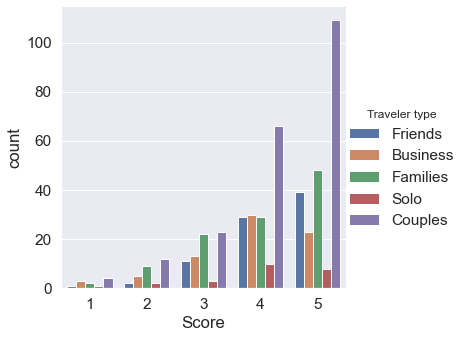

In [85]:
sns.set(font_scale=1.4)
sns.set_style("darkgrid")

# Create a catplot that will count the frequency of "Score" across "Traveler type"
sns.catplot(
  x = "Score",
  data = reviews,
  kind = "count",
  hue = "Traveler type"
)
plt.show()

**The couples Traveler type and a score of 5 were the most common values found in the data. Don't worry about the legend placement. We can move this outside of the chart if needed.**

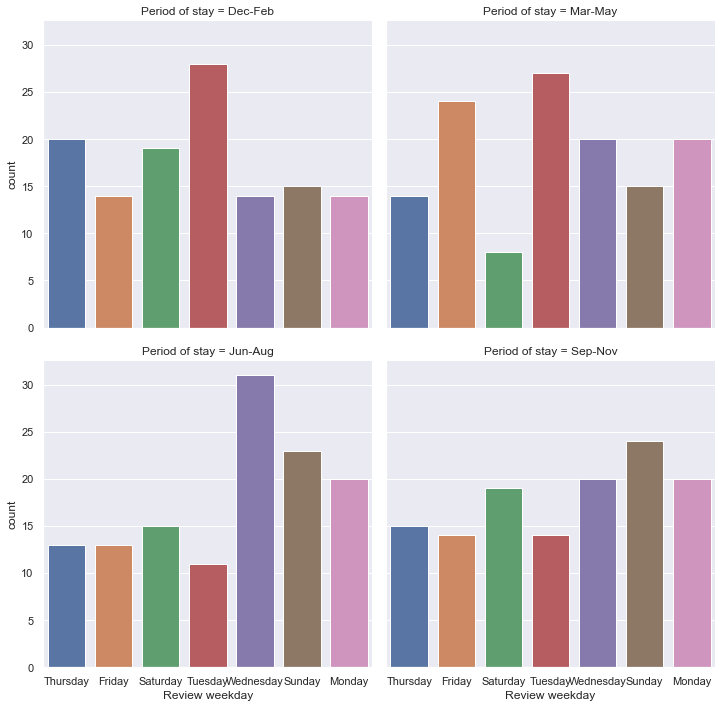

In [95]:
# Create a catplot for each "Period of stay" broken down by "Review weekday"
ax = sns.catplot(
  # Make sure Review weekday is along the x-axis
  x = "Review weekday",
  # Specify Period of stay as the column to create individual graphics for
  col = "Period of stay",
  # Specify that a count plot should be created
  kind = "count",
  # Wrap the plots after every 2nd graphic.
  col_wrap = 2,
  data=reviews
)
sns.set(font_scale=1.5)
plt.show()

**Did you notice that Tuesday was the most common review day for December through May, but one of the least common days for June through November?**

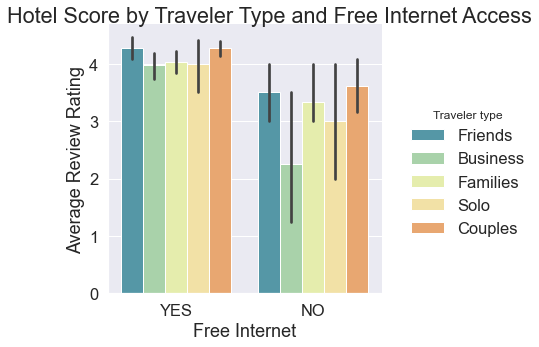

In [99]:
# Adjust the color
ax = sns.catplot(
  x="Free internet", y="Score",
  hue="Traveler type", kind="bar",
  data=reviews,
  palette=sns.color_palette("Spectral_r")
)

# Add a title
ax.fig.suptitle("Hotel Score by Traveler Type and Free Internet Access")
# Update the axis labels
ax.set_axis_labels("Free Internet", "Average Review Rating")

# Adjust the starting height of the graphic
plt.subplots_adjust(top=0.93)
plt.show()

**It looks like free internet really makes a difference, especially for business-related travelers.**

## Pitfalls and Encoding

In [100]:
used_cars = pd.read_csv("cars.csv")

In [115]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [107]:
# Print the frequency table of body_type and include NaN values
print(used_cars["body_type"].value_counts(dropna=False))

# Update NaN values
used_cars.loc[used_cars["body_type"].isna(), "body_type"] = "other"

# Convert body_type to title case
used_cars["body_type"] = used_cars["body_type"].str.title()

# Check the dtype
print(used_cars["body_type"].dtype)

sedan        13011
hatchback     7644
universal     5507
suv           5164
minivan       3608
minibus       1369
van            808
coupe          652
liftback       552
pickup         129
cabriolet       75
limousine       12
Name: body_type, dtype: int64
object


### Create a label encoding and map

In [118]:
# Convert to categorical and print the frequency table
used_cars["color"] = used_cars["color"].astype("category")
print(used_cars["color"].value_counts())

# Create a label encoding
used_cars["color_code"] = used_cars["color"].cat.codes

# Create codes and categories objects
codes = used_cars["color"].cat.codes
categories = used_cars["color"]
color_map = dict(zip(codes, categories))

# Print the map
print(color_map)

black     7705
silver    6852
blue      5802
white     4212
grey      3751
red       2925
green     2760
other     2688
brown      886
violet     463
yellow     303
orange     184
Name: color, dtype: int64
{8: 'silver', 1: 'blue', 7: 'red', 0: 'black', 4: 'grey', 6: 'other', 2: 'brown', 10: 'white', 3: 'green', 9: 'violet', 5: 'orange', 11: 'yellow'}


### Creating a Boolean encoding

In [119]:
# Print the "manufacturer_name" frequency table.
print(used_cars["manufacturer_name"].value_counts())

# Create a Boolean column for the most common manufacturer name
used_cars["is_volkswagen"] = np.where(
  used_cars["manufacturer_name"].str.contains("Volkswagen", regex=False), 1, 0
)
  
# Check the final frequency table
print(used_cars["is_volkswagen"].value_counts())

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

### One-hot encoding specific columns

In [120]:
# Create one-hot encoding for just two columns
used_cars_simple = pd.get_dummies(
  used_cars,
  # Specify the columns from the instructions
  columns = ["manufacturer_name", "transmission"],
  # Set the prefix
  prefix = "dummy"
)

# Print the shape of the new dataset
print(used_cars_simple.shape)

(38531, 87)


**Instead of having over 1,200 columns, this simple dataset only has 85. We won't be able to use categorical columns that have not been encoded, but limiting which categorical columns are included in our algorithm may prevent overfitting and help the dealership quickly assess a car's potential sale price.**